In [29]:
#importing the required packages
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [30]:
# reading the required dataset in variable 'data'. 
#The dataset contains the value of weather variables from January 1985 to December 2013
data = pd.read_csv(r"C:\Users\punit\Desktop\Thesis\New Dataset\Taking\punprecip.csv")
print(data.shape) 
data.head()

(10553, 10)


,Date,Longitude,Latitude,Elevation,Max Temperature,Min Temperature,Precipitation,Wind,Relative Humidity,Solar
0,1/1/1985,75.9375,31.379,260,11.429,4.962,4.277804,2.094020,0.833922,2.362215
1,1/2/1985,75.9375,31.379,260,12.176,3.553,1.891709,1.070998,0.780621,1.628381
2,1/3/1985,75.9375,31.379,260,15.215,2.908,0.000000,1.955551,0.636459,7.630823
3,1/4/1985,75.9375,31.379,260,11.485,7.687,6.416703,1.585266,0.729288,1.912389
4,1/5/1985,75.9375,31.379,260,9.884,7.581,25.347509,1.533139,0.929392,1.297800


In [31]:
#selecting the required columns
df = data[['Date', 'Precipitation']].copy()
df.head()

,Date,Precipitation
0,1/1/1985,4.277804
1,1/2/1985,1.891709
2,1/3/1985,0.000000
3,1/4/1985,6.416703
4,1/5/1985,25.347509


In [32]:
#conversion of Date into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [33]:
df.head()

,Date,Precipitation
0,1985-01-01,4.277804
1,1985-01-02,1.891709
2,1985-01-03,0.000000
3,1985-01-04,6.416703
4,1985-01-05,25.347509


In [34]:
# Date column has been converted as index
df.head()
df.dtypes
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
1985-01-01,4.277804
1985-01-02,1.891709
1985-01-03,0.000000
1985-01-04,6.416703
1985-01-05,25.347509


In [35]:
# splitting into train and test
split_date = '2006-01-01'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [36]:
#ADF test

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [37]:
#ADF test on Precipitation
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Precipitation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.1207
 No. Lags Chosen       = 21
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [38]:
#scaling 
sc = MinMaxScaler()
train = sc.fit_transform(train)
X_train = train[0:len(train)-1]
y_train = train[1:len(train)]
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [39]:
#creating and training model
model = Sequential()
model.add(LSTM(128,activation="linear",input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=2)
print(model.summary())

Epoch 1/100
 - 1s - loss: 0.0023
Epoch 2/100
 - 1s - loss: 0.0021
Epoch 3/100
 - 1s - loss: 0.0021
Epoch 4/100
 - 1s - loss: 0.0021
Epoch 5/100
 - 1s - loss: 0.0021
Epoch 6/100
 - 0s - loss: 0.0021
Epoch 7/100
 - 0s - loss: 0.0021
Epoch 8/100
 - 0s - loss: 0.0021
Epoch 9/100
 - 0s - loss: 0.0021
Epoch 10/100
 - 0s - loss: 0.0021
Epoch 11/100
 - 0s - loss: 0.0021
Epoch 12/100
 - 0s - loss: 0.0021
Epoch 13/100
 - 0s - loss: 0.0021
Epoch 14/100
 - 0s - loss: 0.0021
Epoch 15/100
 - 0s - loss: 0.0021
Epoch 16/100
 - 0s - loss: 0.0021
Epoch 17/100
 - 0s - loss: 0.0020
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0021
Epoch 21/100
 - 1s - loss: 0.0020
Epoch 22/100
 - 1s - loss: 0.0021
Epoch 23/100
 - 1s - loss: 0.0020
Epoch 24/100
 - 1s - loss: 0.0020
Epoch 25/100
 - 1s - loss: 0.0020
Epoch 26/100
 - 1s - loss: 0.0020
Epoch 27/100
 - 1s - loss: 0.0020
Epoch 28/100
 - 1s - loss: 0.0020
Epoch 29/100
 - 1s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [40]:
# inversing the transform
inputs=sc.transform(test)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted = model.predict(inputs)
predicted = sc.inverse_transform(predicted)
test['Predicted']=predicted

In [41]:
# evaluating and printing the rmse and mae values
print(np.sqrt(mean_squared_error(y_true=test['Precipitation'], y_pred=test['Predicted'])))
print('Mean Absolute Error:',mean_absolute_error(y_true=test['Precipitation'], y_pred=test['Predicted']))

8.125948623939479
Mean Absolute Error: 2.8292273778010695


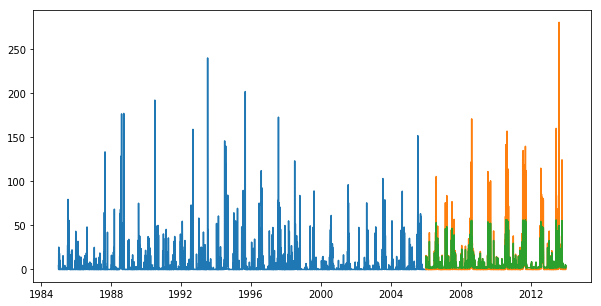

In [42]:
# plotting the forecast
train = df.loc[df.index <= split_date].copy()

plt.figure(figsize=(10,5))
plt.plot(train['Precipitation'])
plt.plot(test[['Precipitation','Predicted']])